<html>
	<author>Hiroshi TAKEMOTO</author>
	(<email>take.pwave@gmail.com</email>)
	<h2>グラフの使い方</h2>
	<p>
		Sageでのグラフの使い方について、説明します。
		<a href="http://doc.sagemath.org/html/en/reference/plotting/sage/plot/plot.html">レファレンスマニュアル</a>
		を参考にしながら見てください。
	</p>
</html>

<html>
<h3>準備</h3>
<p>
テーブル用のCSSの読み込み、jupyter用のdisplayメソッド、sage_utilを読み込みます。
</p>
</html>

In [41]:
%%HTML
<link rel="stylesheet" type="text/css" href="css/sage_table_form.css">

In [42]:
# jupyter用のdisplayメソッド
from IPython.display import display, Latex, HTML, Math, JSON
# ユーティリティ
load('script/sage_util.py')

<html>
	<h3>３次元多項式をもう一度</h3>
	<a href="http://www.pwv.co.jp:8000/home/pub/26/">Sageを使ってみよう</a>
	でプロットした３次元多項式について、plot関数の使い方も含めて詳しくみてみましょう。

	<p>
		plotの呼び出しは、以下の形式で覚えると便利です。
<pre>
plot(関数, [変数名, 最小, 最大], オプション)
</pre>
		オプションは、省略可能です。plotのオプションは、plot.optionsで知ることができます。
		それ以外にもGraphicsのオプションも使えます。よく使うオプションを以下にしめします。
	
		<ul>
         <li>グラフサイズの指定figsize</li>
			<li>描画範囲指定のxmin, xmax, ymin, ymax</li>
			<li>グラフの比率を指定するaspect_ratio</li>
			<li>線の色指定のcolor</li>
		</ul>		
	</p>

	<p>
		３次元多項式の場合には、最初にプロットで使用する変数xをvar関数で定義します。
		次に関数fを定義します。今回はplotの結果をf_pltに代入していますので、最後に
		show関数でf_pltを表示します。
	</p>
	<p>
		f_plt変数に代入することによって、後で他のグラフと重ね合わせて表示することが
		できます。
	</p>
</html>

In [43]:
x = var('x')
f = x^3 - x^2 - 2*x
f_plt = plot(f, [x, -2.5, 2.5])
show(f_plt, figsize=5) 

<html>
	<p>
		plot.optionsを知るには、plot?でヘルプを表示したり、plot_optionsを表示するとよいでしょう。
	</p>
</html>

In [44]:
# plotのオプションを知る
plot.options 

{'adaptive_recursion': 5,
 'adaptive_tolerance': 0.01,
 'alpha': 1,
 'aspect_ratio': 'automatic',
 'detect_poles': False,
 'exclude': None,
 'fill': False,
 'fillalpha': 0.5,
 'fillcolor': 'automatic',
 'legend_label': None,
 'plot_points': 200,
 'rgbcolor': (0, 0, 1),
 'thickness': 1}

<html>
	<h3>接線を求める</h3>
	<p>
		点$(x_0, y_0)$での接線の傾きは、関数fの微分の$x_0$での値から得ることができますので、
		接線の式は、以下のように求めることができます。
$$
		(y - y_0) = f'(x_0) (x - x_0)
$$		
		$y_0$の値は、$f(x_0)$ですから、接線の式は以下のようになります。
$$
		y = f'(x_0) (x - x_0) + f(x_0)
$$
	</p>
	
	<p>
		この計算をSageを使って計算してみましょう。まずSageの変数x0を定義し、y0にf(x=x0)の値を代入します。
		f1にfの微分をセットします。
	</p>	
</html>

In [45]:
# (x0, y0)での接線を求める
x0 = var('x0')
y0 = f(x=x0)
f1 = diff(f, x)
show(f1)

3*x^2 - 2*x - 2

<html>
	<p>
		材料がそろったので、接線の式を定義し表示します。確認のために$x_0 = 0$での式も表示します。
	</p>
	<p>
		$x_0 = 0$での接線は、原点を通り傾き-2と求まりました。
	</p>
</html>

In [46]:
# x0 = 0での接線の式
y = f1(x=x0)*(x - x0) + y0
show(y)
show(y(x0 = 0))

x0^3 + (3*x0^2 - 2*x0 - 2)*(x - x0) - x0^2 - 2*x0

-2*x

<html>
	<p>
		この直線をプロットしてみましょう。
		x0=0での接線の式なので、plotの引数にはyではなく、y(x0=0)が渡されていることに注意してください。
	</p>
	<p>
		重ね合わせたときに区別できるように線の色を緑にします。線の色は、rgbcolorオプションで指定します。
	</p>
</html>

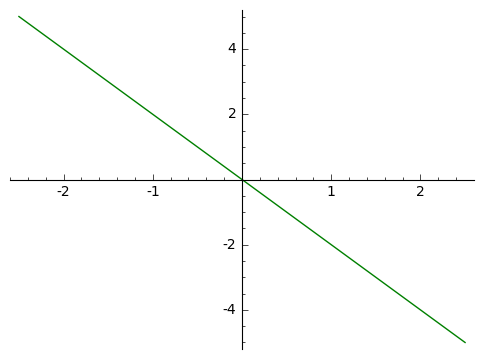

In [47]:
y_plt = plot(y(x0=0), [x, -2.5, 2.5], rgbcolor='green')
show(y_plt, figsize=5)

<html>
	<p>
		接線を計算したポイントを示すために、point関数を使って点を表示します。
	</p>
	<p>
		point関数の使い方は、以下の通りです。座標は、リストまたはタプル形式で与えます。
<pre>
point(座標, オプション属性（pointsize, rgccolor, faceted等）)
</pre>
	</p>
</html>

In [48]:
# x = 0のポイントをセット
pt = (0, f(x=0))
pt_plt = point(pt, rgbcolor='red', pointsize=30)

<html>
	<h3>グラフの重ね合わせ</h3>
	<p>
		Sageのグラフ表示機能の最大の特徴は、重ね合わせです。
		これまで計算した以下の結果を同時に表示してみましょう。
		<ul>
			<li>f_plt: ３次元多項式（青）</li>
			<li>y_plt: 接線（緑）</li>
			<li>pt_plt: 接点（赤）</li>
		</ul>		
	</p>
	<p>
		重ね合わせは至って簡単で上記の３つの変数を足し合わせて、showメソッドで表示するだけです。
	</p>
</html>

In [52]:
(f_plt + y_plt + pt_plt).show(figsize=5)

<html>
<h3>インタラクティブ機能とアニメーション機能</h3>
	<p>
		インタラクティブ機能とアニメーション機能は、SageMathカーネルでは動作しませんので、ここでは省略します。
	</p>
</html>

<html>
	<h3>並べて表示</h3>
	<p>
		Sageのプロット結果は、縦に表示されてしまうため、結果を比較したときには不便です。
	</p>
	<p>
		このような場合には、htmlコマンドにプロットしたいグラフのリストを渡すと、
		表形式に変換して表示してくれます。表示するグラフのオプションにfigsizeでグラフの
		大きさを小さくしておくとよいでしょう。
	</p>
	<p>
		以下にsin曲線とcos曲線の表示例を示します。
	</p>
</html>


<__main__.Table2Html instance at 0x7f7357518b90>
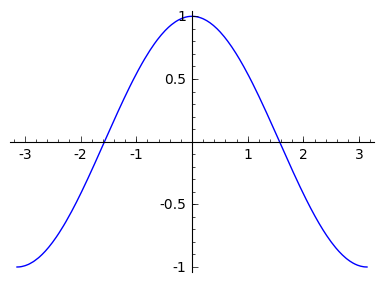

In [53]:
# グラフを並べて表示する
sin_plt = plot(sin(x), [x, -pi, pi], rgbcolor= 'green', figsize=4)
cos_plt = plot(cos(x), [x, -pi, pi], figsize=4)
Table2Html([[_to_png(sin_plt), _to_png(cos_plt)]], header=["sin曲線", "cos曲線"])

<html>
	<h3>リストプロット</h3>
	<p>
		データを表示するのに便利なのが、list_plot関数です。
	</p>
	<p>
		list_plot関数は、以下のように使用します。
<pre>
list_plot(プロットするリスト, オプション)	
</pre>		
	</p>
	<p>
		リストの要素に[x, y]形式で座標を指定すると分布図が表示されます。
		また、plot関数でエラーで表示できない場合の代替手段としてlist_plot関数を使うこともあります。
	</p>
	<p>
		以下にデータ点のプロットの場合とデータを結ぶ場合の例を示します。
	</p>
</html>

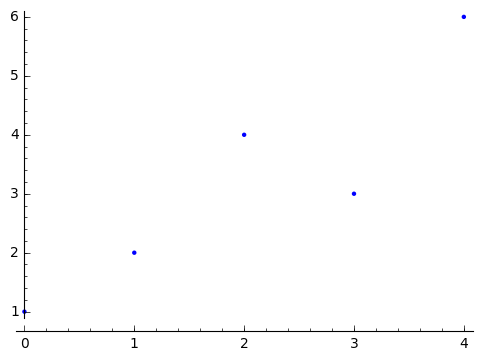

In [54]:
# データを点でプロット
list_plot([1, 2, 4, 3, 6], figsize=5)

In [55]:
# データを結ぶ
list_plot([1, 2, 4, 3, 6], plotjoined=True, figsize=5) 

<html>
	<p>
		異なるデータを同時に表示する場合には、rgbcolorオプションで色をセットしたり、
		legen_labelでデータの種類をセットすると便利です。
	</p>
</html>

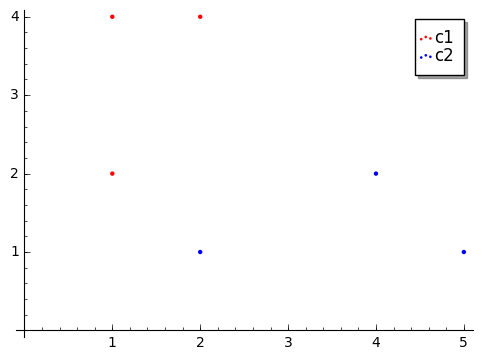

In [56]:
# データ（座標）のプロット
c1 = [[1,2],[1,4],[2,4]]
c2 = [[2,1],[5,1],[4,2]]
# プロットして分布を確認
pl1 = list_plot(c1, rgbcolor='red', legend_label='c1')
pl2 = list_plot(c2, rgbcolor ='blue', legend_label='c2')
(pl1+pl2).show(xmin=0, xmax=5, ymin=0, figsize=5) 

<html>
	<h3>関係を表示</h3>
	<p>
		プロットしたい関数ではなく、条件などの関係式を表示したいときがあります。
		このような場合には、implicit_plotを使うと便利です。
	</p>
	<p>
		implicit_plotの例として、単位円を表示してみます。
		単位円の条件は、以下のように与えられます。
$$
		x^2 + y^2 = 1
$$		
	</p>
	<p>
		これをimplicit_plotで表示すると以下のようになります。
	</p>
</html>


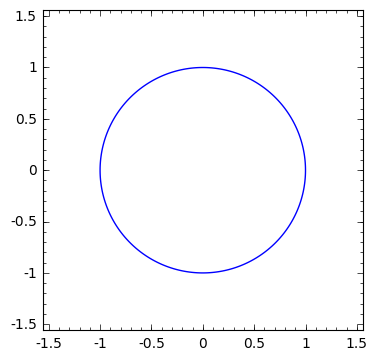

In [57]:
# 関係を満たすグラフを表示する
x, y = var('x y')
i_plt = implicit_plot(x^2 + y^2 == 1, [x, -1.5, 1.5], [y, -1.5, 1.5])
i_plt.show(aspect_ratio=1, figsize=5)

<html>
	<h3>パラメトリックプロット（媒介変数表示）</h3>
	<p>
		x, yが時間変数t（パラメータ）によって表される場合、parametric_plot関数
		を使って表示すると簡単です。
	</p>
	<p>
		パラメトリックプロットの例として、以下のサイクロイド曲線をparametric_plot関数
		で表示してみます。
		
$$
		\begin{eqnarray}
			x = 2 (t - sin(t)) \\
			y = 2 (1 - cos(t))
		\end{eqnarray}
$$
		</p>	
</html>

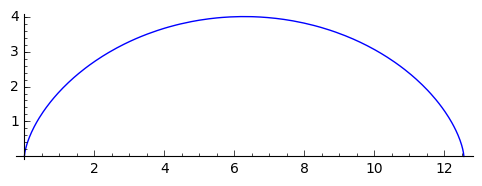

In [58]:
# 媒介変数表示
t = var('t')
x = 2*(t-sin(t))
y = 2*(1-cos(t))
# サイクロイドのプロット（パラメトリックプロットの例）
parametric_plot([x, y], (t, 0, 2*pi), figsize=5)

<html>
	<h3>3次元グラフ</h3>
	<p>
		3次元のグラフには、plot3d関数を使用します。重ね合わせは２次元のグラフと同じように使えます。
	</p>
	<p>
		表示された3次元図形はマウスで自由に拡大、回転することができます。（驚きました）		
	</p>
</html>


In [59]:
x, y = var('x y')
plot3d(lambda x, y: sin(x*y), [x,-pi,pi], [y,-pi,pi])

Graphics3d Object

<html>
	<h4>等高線図</h4>
	<p>
		３次元情報を表示する場合によく使用する方法に投稿線図があります。	
	</p>
	<p>
		投稿線図は、contour_plot関数を使って表示します。
		前のグラフと同じものをcontour_plot関数で表示すると以下のようになります。
	</p>
</html>

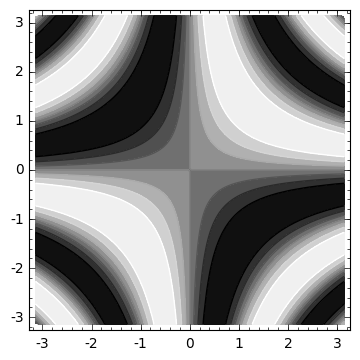

In [60]:
var('x y')
contour_plot(sin(x*y), [x, -pi, pi], [y, -pi, pi], aspect_ratio=1, figsize=5)

<html>
	<h3>基本図形</h3>
	計算結果の表示の他に、補足説明などのために基本図形を表示したい場合があります。<p>
	
	以下によく使う基本図形を以下に示します。
	<ul>
		<li>円: circle</li>
		<li>文字列: text</li>
		<li>線: line</li>
		<li>点: point</li>
		<li>ポリゴン: polygon</li>
	</ul>	
</html>

<html>	
	<h4>円</h4>
	円は以下のように表示します。
<pre>
circle((座標), 半径)
</pre>
	
	circleの例を以下に示します。座標は原点(0, 0)、半径は1です。
</html>

In [61]:
circle((0,0), 1, figsize=5)

<html>
	<h4>文字列</h4>
	<p>
		次に文字列textです。表示する文字列には、＄で囲んでlatexの数式を表示することもできます。
		残念ながら、日本語が含まれているとエラーまたは文字化けします。
	</p>
	<p>
		textは以下の形式で使用します。文字列の中心が指定した座標になるようにプロットされます。
<pre>
text(文字列, (座標))
</pre>
		textの例を以下に示します。		
	</p>
</html>

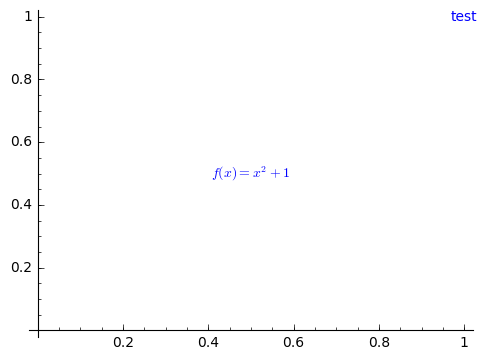

In [62]:
test_plt = text('test', (1, 1))
eq_plt = text('$f(x) = x^2 + 1$', (0.5,0.5))
(test_plt + eq_plt).show(xmin=0, ymin=0, figsize=5)

<html>
	<h4>線</h4>
	<p>
		線（line）は、指定された座標のリストを線で結びます。
		lineの使い方は、簡単です。
<pre>
line([(開始座標), (終了座標)])
</pre>		
	</p>

	<p>
		以下に例を示します。日本語が使えないため、タイトルをhtml関数で先に表示し、その後に図形を表示します。
		show関数で表示領域を指定し、すべての図形が表示されるようにします。		
	</p>	
</html>

In [68]:
c = circle((0.5,0.5), 1, figsize=5)
l = line([(0,0), (1, 1)])
pt = point((0.5, 0.5), rgbcolor='white', pointsize=30, faceted=True)
(c + l + pt).show(xmin=-1, xmax=2, figsize=5)

In [70]:
# HTMLに変換して結合すれば文字列と図形を合わせて表示できる
HTML('<center>テスト</center>' + _to_png(c + l + pt))

<html>
	<h4>ポリゴンの塗りつぶし</h4>
	<p>
		polygon関数を使うとリストで指定した座標の図形を塗りつぶします。
	</p>
</html>

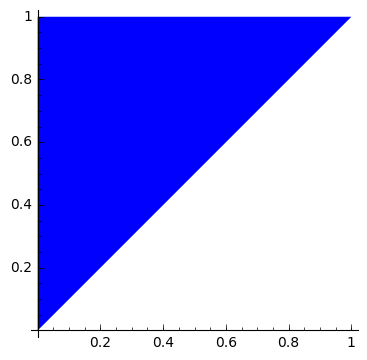

In [71]:
polygon([(0,0), (1,1), (0,1)], figsize=5)